[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GRJ03/Machine_Learning/blob/main/Regression/Support_Vector_Regression.ipynb)


In [23]:
#isme bkl algo m hmesha scaling krna hoga

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


In [26]:
#dep var ko column vector m krte h in svm taaki baadme 2d array as input liya jaye
y=y.reshape(len(y),1)

In [27]:
#scaling
#agar data km ho splitiing na kro
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [28]:
#train
#kernel linear(when data is linear) ya radial(non-linear data) ho skta,
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X,y)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [30]:
#ye tarreka naya h bas
x_pred=reg.predict(X)
#inverse_transform to get the raw data, and not scaled data
#scaled value predicted, ab unscale, inverse transfrom 2d array leta h so reshape(-1,1),isse converted
y_pred=sc_y.inverse_transform(x_pred.reshape(-1,1))
print(y_pred)

[[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]


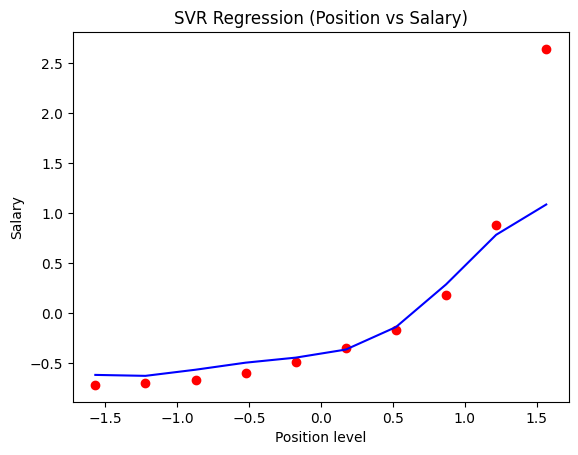

In [37]:
#scaled value plotted no dikkat
plt.scatter(X, y, color='red')  # Actual data points (scaled)
plt.plot(X, x_pred, color='blue')  # Predicted curve
plt.title("SVR Regression (Position vs Salary)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [38]:
#ab compare raw values
from sklearn.metrics import r2_score
print(r2_score(sc_y.inverse_transform(y),y_pred))

0.7516001070620798
